In [32]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
# Import dataset
df = pd.read_csv('data_set/train.csv')

# Get the shape: (rows, columns)
df.shape

(20800, 5)

In [34]:
# Get the head
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [35]:
# Change the labels
df.loc[(df['label'] == 1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 0) , ['label']] = 'REAL'

# Get the head
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  FAKE  
1  Ever get the feeling your life circles the rou...  REAL  
2  Why the Truth Might Get You Fired October 29, ...  FAKE  
3  Videos 15 Civilians Killed In Single US Airstr...  FAKE  
4  Print \nAn Iranian woman has been sentenced to...  FAKE

In [36]:
# Isolate the labels
labels = df.label
labels.head()

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [37]:
# Split the dataset: 80% for train and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(
    df['text'].values.astype('str'),
    labels,
    test_size=0.2,
    random_state=7
)

In [38]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [39]:
# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [40]:
# Initialize the PassiveAggressiveClassifier and fit training sets
pa_classifier = PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [41]:
# Predict and calculate accuracy
y_pred = pa_classifier.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 96.61%


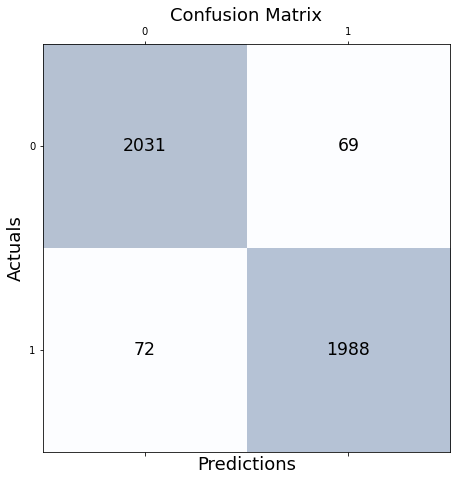

In [42]:
# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j,
            y=i,
            s=conf_matrix[i, j],
            va='center',
            ha='center',
            size='xx-large'
        )
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Save and Load Model

In [21]:
model_filename = 'fake_news_detector.pickle'

In [22]:
# Save Model
pickle.dump(
    pa_classifier,
    open(model_filename, 'wb')
)

In [23]:
# Load Model
loaded_model = pickle.load(
    open(model_filename, 'rb')
)

In [24]:
# Predict
loaded_model.predict(tfidf_test)

array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [25]:
# Calculate accuracy
result = loaded_model.score(tfidf_test, y_test)
print(f'Accuracy: {round(result*100, 2)}%')

Accuracy: 96.49%


In [26]:
tfidf_vectorizer_filename = 'tfidf_vectorizer.pickle'

In [27]:
# Save TfidfVectorizer
pickle.dump(
    tfidf_vectorizer,
    open(tfidf_vectorizer_filename, 'wb')
)

In [28]:
# Load TfidfVectorizer
loaded_tfidf_vectorizer = pickle.load(
    open(tfidf_vectorizer_filename, 'rb')
)

In [29]:
def is_fake_news(news: str, model, tfidf_vectorizer):
    tfidf_news = tfidf_vectorizer.transform([news])
    return (
        'The news is true!'
        if model.predict(tfidf_news)[0] == 'REAL'
        else 'This is fake news!'
    )

In [31]:
news = input()
is_fake_news(news, loaded_model, loaded_tfidf_vectorizer)

'The news is true!'